In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
n=1000
def generate_shift_dataset(n, p_d1):
    n_d1 = int(n * p_d1)
    n_d2 = n - n_d1
    xs_d1 = np.random.uniform(0., 10., n_d1)
    ys_d1 = np.sqrt(xs_d1) + np.random.normal(0., 1., n_d1)
    xs_d2 = np.random.uniform(0., 10., n_d2)
    ys_d2 = 4 *np.sqrt(xs_d2) + 1 + np.random.normal(0., 1., n_d2)
    
    xs = np.hstack((xs_d1, xs_d2))
    ys = np.hstack((ys_d1, ys_d2))
    
    return xs, ys

X_train, y_train = generate_shift_dataset(n, p_d1=0.8)
X_test, y_test = generate_shift_dataset(n, p_d1=0.5)

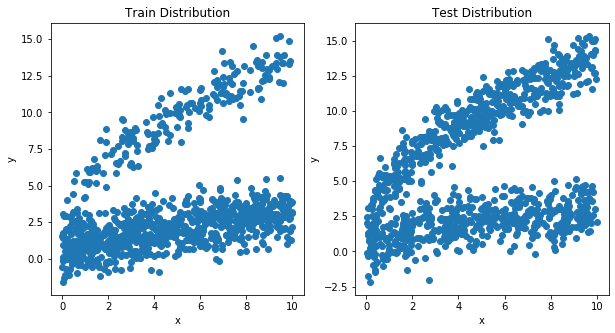

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_train, y_train)
ax[0].set_title("Train Distribution")
ax[1].scatter(X_test, y_test)
ax[1].set_title("Test Distribution")
for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    
plt.savefig("figs/distribution.pdf")

In [3]:
df = pd.read_csv("results/sim.csv")
df.groupby(["dataset", "method", "gamma"]).agg(["mean", "std"])["test_mse"]

mean       std
dataset        method        gamma                     
shifted        erm           1.0    20.900806  0.506424
               ru_regression 2.0    17.054804  0.319087
                             4.0    16.045220  0.248582
                             8.0    15.831953  0.216250
                             16.0   15.777204  0.227169
shifted_oracle erm           1.0    15.672956  0.197280

In [16]:
df.groupby(["dataset", "method"]).agg(["mean", "std"])

gamma           test_loss            test_mse  \
                              mean       std      mean       std      mean   
dataset        method                                                        
shifted        erm             NaN       NaN  2.017378  0.110692  2.017378   
               ru_regression   7.5  5.437962  4.078993  0.685966  1.672522   
shifted_oracle erm             NaN       NaN  0.997780  0.023067  0.997780   

                                            seed            
                                   std      mean       std  
dataset        method                                       
shifted        erm            0.110692  4.500000  3.027650  
               ru_regression  0.088101  4.666667  3.023716  
shifted_oracle erm            0.023067  4.500000  3.027650